In [3]:
import pandas as pd

order_data = pd.read_csv('/Users/dolphinchan/Downloads/Data_Analyst_Test/response_data.csv')

order_data['Order Create Timestamp'] = pd.to_datetime(order_data['Order Create Timestamp'])
order_data['Driver Response Timestamp'] = pd.to_datetime(order_data['Driver Response Timestamp'])

before_change = order_data[order_data['Order Create Timestamp'] < '2017-03-30 12:00:00 AM']
after_change = order_data[order_data['Order Create Timestamp'] >= '2017-03-30 12:00:00 AM']

before_change['before_match_time'] = before_change['Driver Response Timestamp'] - before_change['Order Create Timestamp']
after_change['after_match_time'] = after_change['Driver Response Timestamp'] - after_change['Order Create Timestamp']




/var/folders/2h/fjrwyhdx2fq2y9mwwyjhmm480000gn/T/ipykernel_2341/2942898645.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  before_change['before_match_time'] = before_change['Driver Response Timestamp'] - before_change['Order Create Timestamp']
/var/folders/2h/fjrwyhdx2fq2y9mwwyjhmm480000gn/T/ipykernel_2341/2942898645.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after_change['after_match_time'] = after_change['Driver Response Timestamp'] - after_change['Order Create Timestamp']


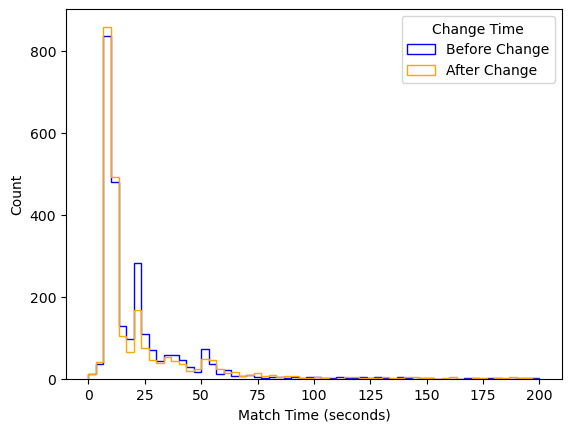

In [49]:
import matplotlib.pyplot as plt

before_change['before_match_time'].astype('timedelta64[s]').plot.hist(bins = 60, histtype = u'step', range = [0,200], color = 'blue', label = 'Before Change')
after_change['after_match_time'].astype('timedelta64[s]').plot.hist(bins = 60, histtype = u'step', range = [0,200], color = 'Orange', label = 'After Change')
plt.legend(title = 'Change Time')
plt.xlabel('Match Time (seconds)')
plt.ylabel('Count')
plt.show()


/var/folders/2h/fjrwyhdx2fq2y9mwwyjhmm480000gn/T/ipykernel_2341/498522623.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['before', 'after'])


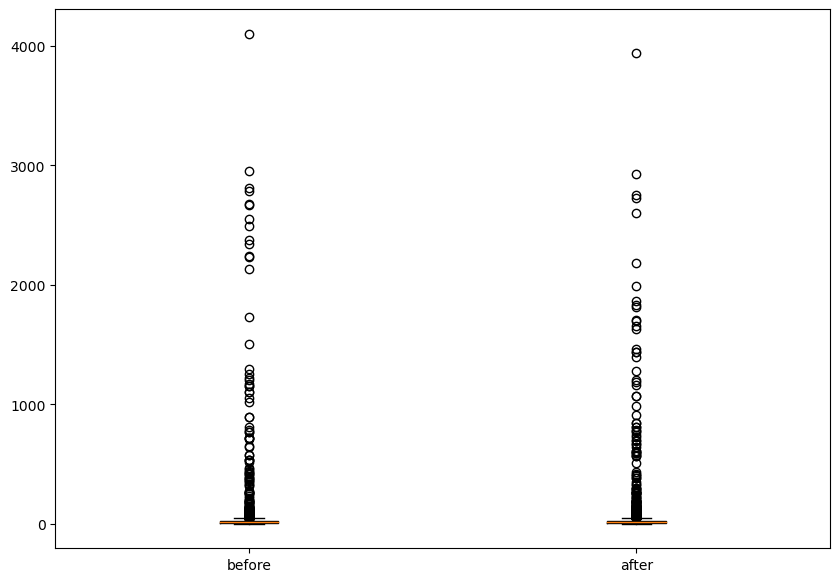

In [69]:
import matplotlib.pyplot as plt

data = [before_change['before_match_time'].astype('timedelta64[s]'), after_change['after_match_time'].astype('timedelta64[s]')]
fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)
ax.set_xticklabels(['before', 'after'])
plt.boxplot(data)
plt.show()

In [31]:
import scipy.stats as stats

t_stat, p_value = stats.ttest_ind(before_change['before_match_time'].astype('timedelta64[s]').dropna(), after_change['after_match_time'].astype('timedelta64[s]').dropna(), equal_var = False)

print('T-statistic:', t_stat)
print('P-value:', p_value)


T-statistic: -0.3586486381483746
P-value: 0.7198731259143623
